In [1]:
import pandas as pd
import numpy as np
#For plotting
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score


In [2]:
df1=pd.read_csv("train.csv")
df2=pd.read_csv("fulfilment_center_info.csv")
df3=pd.read_csv("meal_info.csv")

In [3]:
df1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
df2.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [5]:
df3.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


# Merging the lookups table to main data With primary key as meal_id and center_id respectively

In [6]:
res=pd.merge(df1,df3,on=['meal_id'])

In [7]:
res=pd.merge(res,df2,on=['center_id'])

In [8]:
res.sort_values('week',inplace=True)

In [9]:
res

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
284804,1409622,1,113,2444,658.63,660.63,0,0,14,Seafood,Continental,680,77,TYPE_C,4.0
285005,1203879,1,113,1525,244.50,282.33,0,0,14,Other Snacks,Thai,680,77,TYPE_C,4.0
285106,1235654,1,113,2704,242.50,280.33,0,0,121,Other Snacks,Thai,680,77,TYPE_C,4.0
43263,1393327,1,52,1248,247.35,247.35,0,0,81,Beverages,Indian,685,56,TYPE_B,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287668,1184135,145,145,1778,160.05,160.08,1,0,378,Beverages,Italian,620,77,TYPE_A,3.9
350483,1007940,145,59,1445,727.53,726.53,0,1,40,Seafood,Continental,456,56,TYPE_A,4.2
262083,1154446,145,73,1770,440.38,442.38,0,0,55,Biryani,Indian,576,34,TYPE_A,4.0
448468,1450789,145,51,2304,484.03,485.03,0,0,80,Desert,Indian,638,56,TYPE_A,7.0


In [10]:
res.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [11]:
res.dtypes


id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
dtype: object

In [12]:
print('This dataset has ' + str(res.shape[0]) + ' rows, and ' + str(res.shape[1]) + ' columns')

This dataset has 456548 rows, and 15 columns


Numeric features description

In [13]:
res.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


Univariate Analysis

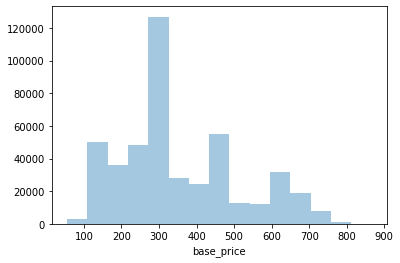

In [14]:
sns.distplot(res.base_price.dropna(), kde=False, bins = 15);

1.The plot looks like positive sekwed with mean of 354 rs

2.People tend to order item which has base price aroud 250-350 rs

checkout_price

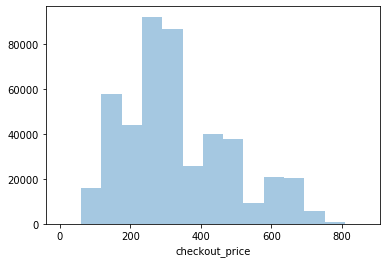

In [15]:
sns.distplot(res.checkout_price.dropna(), kde=False, bins = 15);

1. The graph is positive sekwed with mean of 332

2.Item with checkout price between 250-350 are ordered in high numbers .

# Here we can see that basic price and checkout price have a diffrence . Checkout price is relatively less in than base price

So we can make a feature which "Discount" which tells the discount offered on particular order

# Total amount of discount offered = (base price - checkout price)* number of orders

In [16]:
res['discount'] = (res['base_price'] - res['checkout_price'])*res['num_orders']

In [17]:
res.discount.describe()

count    4.565480e+05
mean     8.676374e+03
std      4.030264e+04
min     -1.228912e+05
25%     -1.300000e+01
50%      1.300000e+01
75%      1.296000e+03
max      3.701953e+06
Name: discount, dtype: float64

From Below code we can notice that discount is applied on more than half of orders

In [18]:
a=res.discount
flag=0
for i in a:
    if i>0:
        flag=flag+1
print(flag)

229687


In [19]:
len(res)

456548

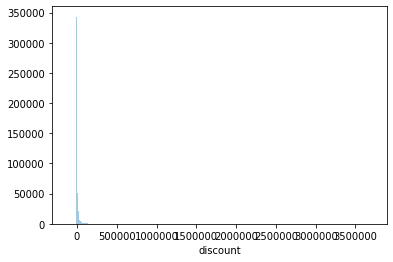

In [20]:
sns.distplot(res.discount.dropna(), kde=False, bins = 400);

It is highly posivtive sekwed

Making discount a "binary" column as this making it will give us the effect of discount on orders

In [21]:
res['discount_amt']=res['discount']
res.loc[res['discount'] <0, 'discount'] = 0
res.loc[res['discount'] > 0, 'discount'] = 1

In [22]:
res.discount.value_counts()

1.0    229687
0.0    226861
Name: discount, dtype: int64

In [23]:
res.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area',
       'discount', 'discount_amt'],
      dtype='object')

Total 77 centers located 

In [24]:
res.center_id.nunique()

77

In [25]:
res.center_id.value_counts()

13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: center_id, Length: 77, dtype: int64

# Center Type

There are three type of center of type  A,B,C.


# Number of restaurant of each type

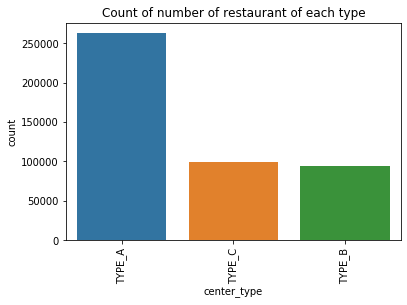

In [26]:
b = sns.countplot(data =res, x = 'center_type', order = res.center_type.value_counts().index)
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Count of number of restaurant of each type')
plt.show()

Type A restaurants are highest in number

# Operation area under each restraunt type

In [27]:
pivot = res.pivot_table(index=['center_type'], values=['op_area'], aggfunc='sum').reset_index()
pivot

,center_type,op_area
0,TYPE_A,1.082014e+06
1,TYPE_B,4.565292e+05
2,TYPE_C,3.258120e+05


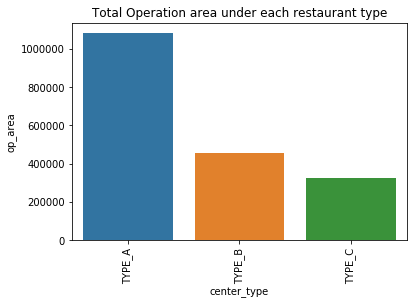

In [28]:
b = sns.barplot(data =pivot, x = 'center_type', y='op_area')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Total Operation area under each restaurant type')
plt.show()

In [29]:
res.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount,discount_amt
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,1.0,2736.42
284804,1409622,1,113,2444,658.63,660.63,0,0,14,Seafood,Continental,680,77,TYPE_C,4.0,1.0,28.00
285005,1203879,1,113,1525,244.50,282.33,0,0,14,Other Snacks,Thai,680,77,TYPE_C,4.0,1.0,529.62
285106,1235654,1,113,2704,242.50,280.33,0,0,121,Other Snacks,Thai,680,77,TYPE_C,4.0,1.0,4577.43
43263,1393327,1,52,1248,247.35,247.35,0,0,81,Beverages,Indian,685,56,TYPE_B,5.6,0.0,0.00


Type A has highest operational area than B and than c

# Checking the most ordered category 

In [30]:
pivot = res.pivot_table(index=['category'], values=['num_orders'], aggfunc='sum').reset_index()
pivot['num_order_percentage'] = pivot['num_orders']/pivot['num_orders'].sum()*100

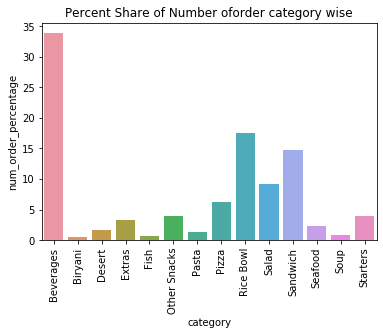

In [31]:
b = sns.barplot(data =pivot, x = 'category', y='num_order_percentage')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Percent Share of Number oforder category wise')
plt.show()

Bevrages, RiceBowls, Sandwich, Salad hold a great share

#  Checking the most ordered CUISINE 

In [32]:
pivot = res.pivot_table(index=['cuisine'], values=['num_orders'], aggfunc='sum').reset_index()
pivot['num_order_percentage'] = pivot['num_orders']/pivot['num_orders'].sum()*100

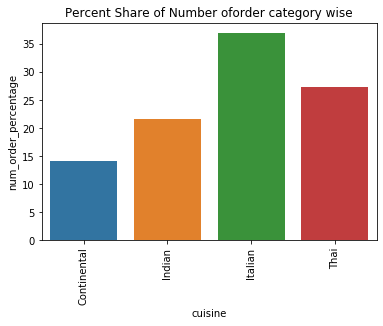

In [33]:
b = sns.barplot(data =pivot, x = 'cuisine', y='num_order_percentage')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Percent Share of Number oforder category wise')
plt.show()

ITALIAN CUISINE ARE MOST ORDERED CUISINE

# Share of number of order region wise

In [34]:
pivot=pd.DataFrame(res.groupby('region_code').num_orders.sum()).reset_index()
pivot['num_order_percentage'] = pivot['num_orders']/pivot['num_orders'].sum()*100
pivot

,region_code,num_orders,num_order_percentage
0,23,1609906,1.346554
1,34,24051733,20.117296
2,35,691044,0.578001
3,56,60520191,50.620161
4,71,2103282,1.759222
5,77,20529653,17.171366
6,85,8685386,7.264611
7,93,1366290,1.142789


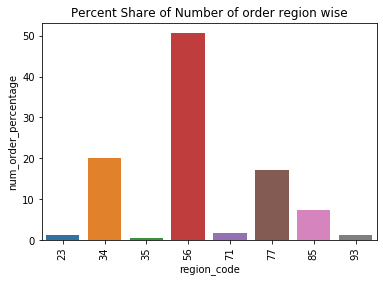

In [35]:
b = sns.barplot(data =pivot, x = 'region_code', y='num_order_percentage')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Percent Share of Number of order region wise')
plt.show()

region with region code =56 have around 50% share in total orders

In [36]:
res.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area',
       'discount', 'discount_amt'],
      dtype='object')

# Category most featured in homepage

In [37]:
pivot=pd.DataFrame(res.groupby('category').homepage_featured.sum()).reset_index()
pivot['homepage_featured_perc'] = pivot['homepage_featured']/pivot['homepage_featured'].sum()*100
pivot

,category,homepage_featured,homepage_featured_perc
0,Beverages,14573,29.230769
1,Biryani,60,0.120349
2,Desert,3367,6.753585
3,Extras,262,0.525524
4,Fish,408,0.818373
5,Other Snacks,4809,9.645973
6,Pasta,3805,7.632133
7,Pizza,7586,15.216127
8,Rice Bowl,2958,5.933206
9,Salad,1767,3.544278


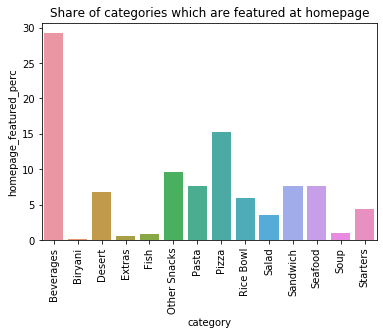

In [38]:
b = sns.barplot(data =pivot, x = 'category', y='homepage_featured_perc')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Share of categories which are featured at homepage')
plt.show()

30% of times beverages featured on homepage|||
around 15% of times pizza is featured on homepage

# Category most promoted through email

In [39]:
pivot=pd.DataFrame(res.groupby('category').emailer_for_promotion.sum()).reset_index()
pivot['emailer_for_promotion_perc'] = pivot['emailer_for_promotion']/pivot['emailer_for_promotion'].sum()*100
pivot

,category,emailer_for_promotion,emailer_for_promotion_perc
0,Beverages,6596,17.802969
1,Biryani,0,0.000000
2,Desert,1804,4.869096
3,Extras,0,0.000000
4,Fish,141,0.380567
5,Other Snacks,653,1.762483
6,Pasta,2669,7.203779
7,Pizza,9382,25.322537
8,Rice Bowl,3086,8.329285
9,Salad,2084,5.624831


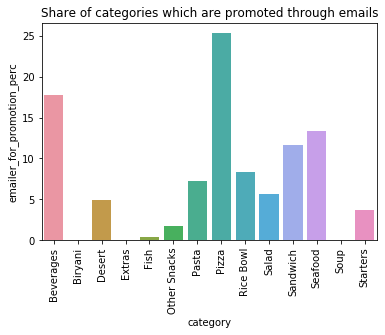

In [40]:
b = sns.barplot(data =pivot, x = 'category', y='emailer_for_promotion_perc')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Share of categories which are promoted through emails')
plt.show()

Pizza is most promoted category for email promotion , around 25%  

# Percentage times categories are getting discounts

In [41]:
pivot=pd.DataFrame(res.groupby('category').discount.sum()).reset_index()
pivot['discount_percc'] = pivot['discount']/pivot['discount'].sum()*100
pivot

,category,discount,discount_percc
0,Beverages,63149.0,27.493502
1,Biryani,8818.0,3.839138
2,Desert,15155.0,6.598110
3,Extras,9413.0,4.098186
4,Fish,4145.0,1.804630
5,Other Snacks,16316.0,7.103580
6,Pasta,16003.0,6.967308
7,Pizza,19662.0,8.560345
8,Rice Bowl,16957.0,7.382656
9,Salad,12114.0,5.274134


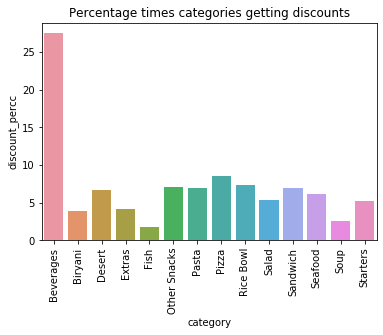

In [42]:
b = sns.barplot(data =pivot, x = 'category', y='discount_percc')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Percentage times categories getting discounts')
plt.show()

beverages are getting discount around more than 25% times


# Categories getting high discounts on base price(By amount)

In [43]:
pivot=pd.DataFrame(res.groupby('category').discount_amt.sum()).reset_index()
pivot['discount_amt_percc'] = pivot['discount_amt']/pivot['discount_amt'].sum()*100
pivot

,category,discount_amt,discount_amt_percc
0,Beverages,5.092354e+08,12.855646
1,Biryani,7.904522e+06,0.199550
2,Desert,8.578011e+07,2.165518
3,Extras,8.463568e+07,2.136627
4,Fish,3.262405e+07,0.823594
5,Other Snacks,1.042207e+08,2.631051
6,Pasta,7.212567e+07,1.820812
7,Pizza,8.279369e+08,20.901262
8,Rice Bowl,9.001842e+08,22.725146
9,Salad,2.419834e+08,6.108870


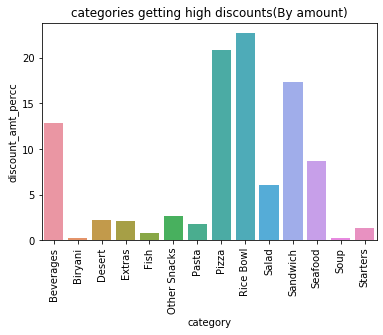

In [44]:
b = sns.barplot(data =pivot, x = 'category', y='discount_amt_percc')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('categories getting high discounts(By amount)')
plt.show()

Rice Bowl and pizza are getting highest discount on the base price

In [45]:
pivot = res.pivot_table(index=['week'], values=['num_orders'], aggfunc='sum').reset_index()
pivot


,week,num_orders
0,1,792261
1,2,787084
2,3,695262
3,4,743529
4,5,1198675
...,...,...
140,141,776240
141,142,739661
142,143,759926
143,144,801197


# Plotting number of orders week wise

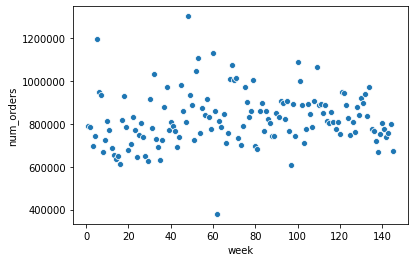

In [46]:
b = sns.scatterplot(data =pivot, x = 'week', y='num_orders')
plt.title('')
plt.show()

In [47]:
res.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area',
       'discount', 'discount_amt'],
      dtype='object')

# Feature Engineering and Selection


# Removing id column


In [48]:
res.drop(['id'],axis=1,inplace=True) #dropiing id columns 


In [49]:
res.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount,discount_amt
0,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,1.0,2736.42
284804,1,113,2444,658.63,660.63,0,0,14,Seafood,Continental,680,77,TYPE_C,4.0,1.0,28.00
285005,1,113,1525,244.50,282.33,0,0,14,Other Snacks,Thai,680,77,TYPE_C,4.0,1.0,529.62
285106,1,113,2704,242.50,280.33,0,0,121,Other Snacks,Thai,680,77,TYPE_C,4.0,1.0,4577.43
43263,1,52,1248,247.35,247.35,0,0,81,Beverages,Indian,685,56,TYPE_B,5.6,0.0,0.00


In [50]:
res.groupby('cuisine').checkout_price.mean()

cuisine
Continental    515.978809
Indian         340.769833
Italian        285.133102
Thai           213.323235
Name: checkout_price, dtype: float64

In [51]:
res.groupby('center_type').region_code.mean()

center_type
TYPE_A    57.081447
TYPE_B    54.680060
TYPE_C    57.209513
Name: region_code, dtype: float64

# DISCOUNT,DISCOUNT_AMT  columns made in EDA section.


# Discount is a binary column stating wether discount was there on order or not

# Discount Amt is continous column which states the ammount of discount offered.|| Discount_amt=(base_price-checkout_price)*num_orders

Checking the correlation of the discount and discount amt feature with correlation matrix

In [52]:
res.corr()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,discount,discount_amt
week,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550,-0.017744,-0.015816
center_id,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,0.061078,-0.003426,-0.111869,-0.002971,-0.017998
meal_id,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546,-0.033679,-0.006283
checkout_price,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,-0.004805,-0.003648,0.021569,-0.103340,-0.054459
base_price,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,-0.002054,-0.001934,0.018031,0.043064,0.096008
emailer_for_promotion,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462,0.276454,0.427860
homepage_featured,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498,0.213979,0.321384
num_orders,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976,0.111766,0.673281
city_code,0.000405,0.061078,-0.003198,-0.004805,-0.002054,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476,0.003876,0.020490
region_code,0.004600,-0.003426,-0.001662,-0.003648,-0.001934,-0.007462,0.003605,0.029744,0.042686,1.000000,0.023327,0.003672,0.014681


# Here we can see that dicount_ amt is having great correlation with target column

# Analyzing category and its respective cuisines

In [53]:
pivot=pd.DataFrame(res.groupby(['category','cuisine']).num_orders.sum()).reset_index()
pivot

,category,cuisine,num_orders
0,Beverages,Continental,5943046
1,Beverages,Indian,2345879
2,Beverages,Italian,13953970
3,Beverages,Thai,18237630
4,Biryani,Indian,631848
5,Desert,Indian,1940754
6,Extras,Thai,3984979
7,Fish,Continental,871959
8,Other Snacks,Thai,4766293
9,Pasta,Italian,1637744


# From here we can see that only beverage is the item which is all cuisine


# We can combine these columns and get one column called product

In [54]:
res["item"] = res["category"] +"_"+ res["cuisine"]

In [55]:
res.item.value_counts()

Rice Bowl_Indian         33408
Beverages_Italian        33381
Sandwich_Italian         33291
Pizza_Continental        33138
Beverages_Thai           32659
Beverages_Continental    32554
Starters_Thai            29941
Other Snacks_Thai        29379
Beverages_Indian         29296
Desert_Indian            29294
Salad_Italian            28559
Pasta_Italian            27694
Seafood_Continental      26916
Biryani_Indian           20614
Extras_Thai              13562
Soup_Thai                12675
Fish_Continental         10187
Name: item, dtype: int64

In [56]:
res.columns

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area',
       'discount', 'discount_amt', 'item'],
      dtype='object')

# Dropping the cuisine and category column as we already made a new column out of it

In [57]:
res.drop(['cuisine','category'],axis=1,inplace=True)

In [58]:
res.week.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145], dtype=int64)

# Splitting the data into two train and test 

# This is a forecasting problem statement so we need to preserve the time 

# So, Splitting on basis of week 

In [59]:
res_test=res[res['week']>116]

In [60]:
res_train=res[res['week']<=116]

In [61]:
res_train

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,discount,discount_amt,item
0,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,1.0,2736.42,Beverages_Thai
284804,1,113,2444,658.63,660.63,0,0,14,680,77,TYPE_C,4.0,1.0,28.00,Seafood_Continental
285005,1,113,1525,244.50,282.33,0,0,14,680,77,TYPE_C,4.0,1.0,529.62,Other Snacks_Thai
285106,1,113,2704,242.50,280.33,0,0,121,680,77,TYPE_C,4.0,1.0,4577.43,Other Snacks_Thai
43263,1,52,1248,247.35,247.35,0,0,81,685,56,TYPE_B,5.6,0.0,0.00,Beverages_Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231824,116,153,2306,325.92,325.92,0,0,42,590,56,TYPE_A,3.9,0.0,0.00,Pasta_Italian
305605,116,67,2539,150.38,149.38,0,0,636,638,56,TYPE_B,7.0,0.0,-636.00,Beverages_Thai
68940,116,57,1109,328.83,329.83,0,0,96,541,77,TYPE_C,2.8,1.0,96.00,Rice Bowl_Indian
304709,116,72,1543,472.39,473.39,0,0,27,638,56,TYPE_C,3.9,1.0,27.00,Desert_Indian


In [62]:
res.groupby('center_type').num_orders.mean()

center_type
TYPE_A    262.394456
TYPE_B    318.856145
TYPE_C    206.670097
Name: num_orders, dtype: float64

# Target Encoding The center_type Columns

# Here we are using target encode , Using num_orders to encode the center_type will replace categorical variable with mean of num_of orders 

In [63]:
res_train.loc[:,'center_type']=res_train['center_type'].map(res_train.groupby('center_type').num_orders.mean())


C:\Users\akhil.damri\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [64]:
lookup=(res_train.groupby('center_type').num_orders.mean())

# Mapping the test data with lookup table 

In [65]:
res_test.loc[:,'center_type']=res_test['center_type'].map(lookup)


In [66]:
res_test

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,discount,discount_amt,item
171425,117,36,2569,298.76,300.76,0,0,229,517,56,NaN,4.4,1.0,458.00,Salad_Italian
184681,117,177,2826,314.34,314.34,0,0,365,683,56,NaN,3.4,0.0,0.00,Sandwich_Italian
274623,117,104,2760,243.53,242.53,0,0,108,647,56,NaN,4.5,0.0,-108.00,Other Snacks_Thai
310167,117,67,1878,290.03,290.03,0,0,310,638,56,NaN,7.0,0.0,0.00,Starters_Thai
427869,117,23,2306,358.93,357.93,0,0,13,698,23,NaN,3.4,0.0,-13.00,Pasta_Italian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287668,145,145,1778,160.05,160.08,1,0,378,620,77,NaN,3.9,1.0,11.34,Beverages_Italian
350483,145,59,1445,727.53,726.53,0,1,40,456,56,NaN,4.2,0.0,-40.00,Seafood_Continental
262083,145,73,1770,440.38,442.38,0,0,55,576,34,NaN,4.0,1.0,110.00,Biryani_Indian
448468,145,51,2304,484.03,485.03,0,0,80,638,56,NaN,7.0,1.0,80.00,Desert_Indian


# Target Encoding The item Columns

Encoding ITEM column with num_orders will replace the item with average number of order for each

In [67]:
encode=res_train.groupby('item').num_orders.mean()
encode

item
Beverages_Continental    188.684152
Beverages_Indian          79.610942
Beverages_Italian        414.319820
Beverages_Thai           577.249279
Biryani_Indian            30.211457
Desert_Indian             63.385334
Extras_Thai              300.667321
Fish_Continental          74.950796
Other Snacks_Thai        164.568553
Pasta_Italian             59.633162
Pizza_Continental        221.806778
Rice Bowl_Indian         626.602980
Salad_Italian            398.751532
Sandwich_Italian         527.610911
Seafood_Continental      104.640442
Soup_Thai                 74.812394
Starters_Thai            163.135485
Name: num_orders, dtype: float64

In [68]:
res_train.loc[:,'item']=res_train['item'].map(res_train.groupby('item').num_orders.mean())

C:\Users\akhil.damri\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# Mapping encode lookup table with test set

In [69]:
res_test.loc[:,'item']=res_test['item'].map(encode)

In [70]:
res_test = res_test.apply(pd.to_numeric, errors='coerce')
res_train = res_train.apply(pd.to_numeric, errors='coerce')

In [71]:
res_train.columns

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'discount', 'discount_amt',
       'item'],
      dtype='object')

In [72]:
res.meal_id.isnull().sum()

0

# meal_id and center_id are the columns which were used to merge table .

# meal_id and center_id are type of categorical variables of particular meal and center respectively 

In [73]:
print("Number of unique meals are :",res.meal_id.nunique())
print("Number of unique centers are :",res.center_id.nunique())

Number of unique meals are : 51
Number of unique centers are : 77


# Target Encoding meal_id and center_id

In [74]:
tencode=res_train.groupby('meal_id').num_orders.mean()


In [75]:
res_train.loc[:,'meal_id']=res_train['meal_id'].map(tencode)

In [76]:
res_test.loc[:,'meal_id']=res_test['meal_id'].map(tencode)

# Target Encoding center_id

In [77]:
tencode=res_train.groupby('center_id').num_orders.mean()


In [78]:
res_train.loc[:,'center_id']=res_train['center_id'].map(tencode)

In [79]:
res_test.loc[:,'center_id']=res_test['center_id'].map(tencode)

In [80]:
res_test

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,discount,discount_amt,item
171425,117,295.283103,359.130206,298.76,300.76,0,0,229,517,56,NaN,4.4,1.0,458.00,398.751532
184681,117,196.202140,457.328612,314.34,314.34,0,0,365,683,56,NaN,3.4,0.0,0.00,527.610911
274623,117,369.961220,143.813661,243.53,242.53,0,0,108,647,56,NaN,4.5,0.0,-108.00,164.568553
310167,117,408.421738,155.364336,290.03,290.03,0,0,310,638,56,NaN,7.0,0.0,0.00,163.135485
427869,117,252.442840,63.329234,358.93,357.93,0,0,13,698,23,NaN,3.4,0.0,-13.00,59.633162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287668,145,264.523621,290.177178,160.05,160.08,1,0,378,620,77,NaN,3.9,1.0,11.34,414.319820
350483,145,291.793935,112.474276,727.53,726.53,0,1,40,456,56,NaN,4.2,0.0,-40.00,104.640442
262083,145,198.705227,27.842055,440.38,442.38,0,0,55,576,34,NaN,4.0,1.0,110.00,30.211457
448468,145,327.035149,61.510328,484.03,485.03,0,0,80,638,56,NaN,7.0,1.0,80.00,63.385334


In [81]:
y_train= res_train.filter(['num_orders'], axis=1)

In [82]:
X_train=res_train.drop(['num_orders'],axis=1)

In [83]:
y_test= res_test.filter(['num_orders'], axis=1)

In [84]:
X_test=res_test.drop(['num_orders'],axis=1)

# Scaling the prediction vector

In [85]:
y_train=np.log(y_train)

In [86]:
X_train

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,discount,discount_amt,item
0,1,167.661982,760.348827,136.83,152.29,0,0,647,56,209.118177,2.0,1.0,2736.42,577.249279
284804,1,249.250641,107.307881,658.63,660.63,0,0,680,77,209.118177,4.0,1.0,28.00,104.640442
285005,1,249.250641,186.777703,244.50,282.33,0,0,680,77,209.118177,4.0,1.0,529.62,164.568553
285106,1,249.250641,165.307453,242.50,280.33,0,0,680,77,209.118177,4.0,1.0,4577.43,164.568553
43263,1,442.001086,89.702309,247.35,247.35,0,0,685,56,322.315483,5.6,0.0,0.00,79.610942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231824,116,232.822942,63.329234,325.92,325.92,0,0,590,56,266.669195,3.9,0.0,0.00,59.633162
305605,116,408.421738,330.870612,150.38,149.38,0,0,638,56,322.315483,7.0,0.0,-636.00,577.249279
68940,116,172.250630,551.053589,328.83,329.83,0,0,541,77,209.118177,2.8,1.0,96.00,626.602980
304709,116,252.348160,71.781595,472.39,473.39,0,0,638,56,209.118177,3.9,1.0,27.00,63.385334


In [87]:
import xgboost as xgb

#  GETTING FEATURE SCORE

In [88]:
from sklearn.metrics import auc, accuracy_score, mean_squared_error,mean_absolute_error

In [89]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)

[12:38:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# Plotting F-score (feature importance)

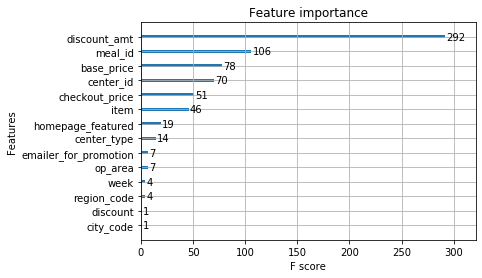

In [90]:
xgb.plot_importance(xgb_model)

# discount_amt , base_price ,meal_id, center_id, checkout_price, item are most contributing features

# Dropping columns with less f-score

In [91]:
res_test.drop(['discount','city_code','emailer_for_promotion','homepage_featured','center_type','region_code'],axis=1,inplace=True)
res_train.drop(['discount','city_code','emailer_for_promotion','homepage_featured','center_type','region_code'],axis=1,inplace=True)

# Final Columns taken for training

In [92]:
res_train.head()

,week,center_id,meal_id,checkout_price,base_price,num_orders,op_area,discount_amt,item
0,1,167.661982,760.348827,136.83,152.29,177,2.0,2736.42,577.249279
284804,1,249.250641,107.307881,658.63,660.63,14,4.0,28.00,104.640442
285005,1,249.250641,186.777703,244.50,282.33,14,4.0,529.62,164.568553
285106,1,249.250641,165.307453,242.50,280.33,121,4.0,4577.43,164.568553
43263,1,442.001086,89.702309,247.35,247.35,81,5.6,0.00,79.610942


In [93]:
y_train= res_train.filter(['num_orders'], axis=1)
X_train=res_train.drop(['num_orders'],axis=1)
y_test= res_test.filter(['num_orders'], axis=1)
X_test=res_test.drop(['num_orders'],axis=1)
y_train=np.log(y_train)

# Applying model

Feature scaling using standard scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training model using XGBoost Regressor

In [94]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)

[12:38:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# RMSE ON TEST SET

In [95]:
y_pred = xgb_model.predict(X_test)
y_pred=np.exp(y_pred)
mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

174.39983577260912


# RMSE ON TRAIN SET

In [96]:
y_pred1= xgb_model.predict(X_train)
y_pred1=np.exp(y_pred1)
y_train=np.exp(y_train)
mse=mean_squared_error(y_train, y_pred1)

print(np.sqrt(mse))

175.84203390899367


# MAE on TEST SET

In [97]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
mae

79.0806030220244

# MAE ON TRAIN SET

In [98]:
mae=mean_absolute_error(y_train,y_pred1)
mae

79.70443584616338

# R2 SCORE ON TEST SET


In [99]:
r2_score(y_test, y_pred)

0.7719627700060571

# R2 SCORE ON TRAIN SET


In [100]:
r2_score(y_train, y_pred1)

0.8101293277846586

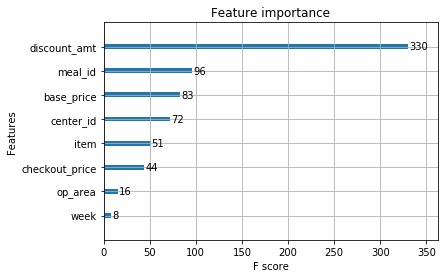

In [101]:
xgb.plot_importance(xgb_model)

In [102]:
    
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics


# Linear Regression 

In [103]:
X_test_new=X_test.reset_index(drop=True)

In [104]:
lr = LinearRegression()  
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test_new)

print('Root Mean Squared Error for LinearRegression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for LinearRegression: 198.3994249366241


In [105]:
y_train

,num_orders
0,177.0
284804,14.0
285005,14.0
285106,121.0
43263,81.0
...,...
231824,42.0
305605,636.0
68940,96.0
304709,27.0


In [106]:
y_pred

array([[334.85572982],
       [316.82415053],
       [240.63200331],
       ...,
       [-32.1809927 ],
       [116.26705452],
       [-29.98712625]])

# R2 score Linear Regression

In [107]:
r2_score(y_test, y_pred)

0.7048828612161595

In [108]:
flag=0
for i in y_pred:
    if i<0:
        flag=flag+1
print(flag)

11544


# KNN 

In [109]:
knn = KNeighborsRegressor()  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Root Mean Squared Error for knn:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for knn: 153.02886050781183


In [120]:
flag=0
for i in y_pred:
    if i<0:
        flag=flag+1
print(flag)

0


# KNN R2 Score

In [121]:
r2_score(y_test, y_pred)

0.8721961020599844

# Decision Tree Regressor

In [122]:
dt = DecisionTreeRegressor()  
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


print('Root Mean Squared Error for DecisionTree:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for DecisionTree: 147.34311479295786


In [123]:
flag=0
for i in y_pred:
    if i<0:
        flag=flag+1
print(flag)

0


# Decision Tree R2 score

In [124]:
r2_score(y_test, y_pred)

0.837230396105637

In [125]:
from sklearn.ensemble import VotingRegressor

In [126]:
r1 =  KNeighborsRegressor()  
r2 = DecisionTreeRegressor()

In [127]:
er = VotingRegressor([('knn', r1), ('dt', r2)])
print(er.fit(X_train, y_train).predict(X_test))

C:\Users\akhil.damri\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[458.3 204.7 101.2 ...  56.1  82.   24.5]


In [128]:
y_pred=er.predict(X_test)

In [129]:
r2_score(y_test, y_pred)

0.8737937056837851

import lightgbm
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}
model = lightgbm.train(parameters,
                       X_train,
                       valid_sets=y_test,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

In [130]:
print('Root Mean Squared Error for LinearRegression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for LinearRegression: 129.7429297927154


In [131]:
flag=0
for i in y_pred:
    if i<0:
        flag=flag+1
print(flag)

0
